In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd 

In [3]:
pip install python-ternary

Note: you may need to restart the kernel to use updated packages.


# Load Data

In [4]:
df_samples = pd.read_excel (r'C:\Users\698422\Desktop\Teaching\Programming\Working Dataset\Basalt_TraceElement_ForStudents.xlsx', sheet_name='Major_Elements_Transpose')
print (df_samples)

      Location Geological Setting Sample No.   SiO2  TiO2  Al2O3  Fe2O3  \
0     HAWAIIAN          THOLEIITE     193-00  49.00  2.43  11.75    NaN   
1     EAST AFR               RIFT     W00-43  46.78  2.25  15.73    NaN   
2     COLUMBIA              RIVER      44760  51.90  1.56  15.88    NaN   
3    TONGA ARC          CONV MARG     129273  51.51  1.41  16.26    NaN   
4    MID-OCEAN              RIDGE    075-010  49.75  1.08  14.81    NaN   
..         ...                ...        ...    ...   ...    ...    ...   
270   HAWAIIAN          THOLEIITE   622-7.10  48.84  2.15  11.12    NaN   
271   EAST AFR               RIFT       N-09  45.05  2.57  16.94    NaN   
272   COLUMBIA              RIVER      44788  54.72  1.86  13.87    NaN   
273  TONGA ARC          CONV MARG     129277  50.16  1.29  17.80    NaN   
274  MID-OCEAN              RIDGE    075-010  49.75  1.08  14.81    NaN   

          FeOT   MnO    MgO    CaO  Na2O   K2O  P2O5  LOI       Total  
0    11.550000  0.18  10.86

In [5]:
df_samples.head()

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total
0,HAWAIIAN,THOLEIITE,193-00,49.00,2.43,11.75,NaN,11.550000,0.18,10.86,10.32,1.74,0.43,0.24,0.0,98.500000
1,EAST AFR,RIFT,W00-43,46.78,2.25,15.73,NaN,11.490446,0.19,7.35,11.00,2.68,0.58,0.42,NaN,98.470446
2,COLUMBIA,RIVER,44760,51.90,1.56,15.88,NaN,11.090000,0.19,5.28,10.57,2.85,0.47,0.22,NaN,100.010000
3,TONGA ARC,CONV MARG,129273,51.51,1.41,16.26,NaN,9.146274,0.13,7.11,10.96,3.19,0.24,0.14,NaN,100.096274
4,MID-OCEAN,RIDGE,075-010,49.75,1.08,14.81,NaN,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,NaN,98.698602


In [6]:
df_samples.tail()

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total
270,HAWAIIAN,THOLEIITE,622-7.10,48.84,2.15,11.12,NaN,11.140000,0.18,13.73,9.32,1.71,0.27,0.21,0.6,99.270000
271,EAST AFR,RIFT,N-09,45.05,2.57,16.94,NaN,11.364474,0.18,7.25,11.49,2.41,0.75,0.39,NaN,98.394474
272,COLUMBIA,RIVER,44788,54.72,1.86,13.87,NaN,12.360000,0.21,4.25,7.75,3.34,1.31,0.33,NaN,100.000000
273,TONGA ARC,CONV MARG,129277,50.16,1.29,17.80,NaN,7.862126,0.15,6.00,12.58,3.01,0.21,0.12,NaN,99.182126
274,MID-OCEAN,RIDGE,075-010,49.75,1.08,14.81,NaN,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,NaN,98.698602


In [7]:
df_samples.describe()

,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total
count,275.000000,275.000000,275.000000,0.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,55.000000,275.000000
mean,50.071855,1.747491,14.168764,NaN,11.040368,0.184655,8.537964,10.141782,2.479527,0.558473,0.248764,0.308000,99.241241
std,3.028278,0.617325,2.193854,NaN,1.176042,0.018447,4.587362,1.743606,0.681139,0.479021,0.155117,0.433143,0.653638
min,45.050000,0.520000,6.470000,NaN,7.862126,0.130000,1.900000,5.390000,0.800000,0.020000,0.040000,0.000000,97.795616
25%,47.460000,1.130000,13.640000,NaN,10.707620,0.180000,5.650000,8.625000,1.940000,0.190000,0.110000,0.000000,98.702079
50%,49.750000,1.860000,14.670000,NaN,11.200000,0.180000,7.800000,10.480000,2.540000,0.400000,0.220000,0.000000,99.089424
75%,51.805000,2.220000,15.650000,NaN,11.640000,0.190000,8.710000,11.570000,3.110000,0.930000,0.380000,0.480000,99.990000
max,63.650000,3.000000,17.800000,NaN,14.130000,0.240000,26.460000,13.510000,3.860000,2.240000,0.610000,1.850000,100.990262


In [8]:
df_normalize=df_samples

In [9]:
sum_column = df_samples["Na2O"] + df_samples["K2O"]
df_samples["Na2O + K2O"] = sum_column
print(df_samples)
df_samples.head()

      Location Geological Setting Sample No.   SiO2  TiO2  Al2O3  Fe2O3  \
0     HAWAIIAN          THOLEIITE     193-00  49.00  2.43  11.75    NaN   
1     EAST AFR               RIFT     W00-43  46.78  2.25  15.73    NaN   
2     COLUMBIA              RIVER      44760  51.90  1.56  15.88    NaN   
3    TONGA ARC          CONV MARG     129273  51.51  1.41  16.26    NaN   
4    MID-OCEAN              RIDGE    075-010  49.75  1.08  14.81    NaN   
..         ...                ...        ...    ...   ...    ...    ...   
270   HAWAIIAN          THOLEIITE   622-7.10  48.84  2.15  11.12    NaN   
271   EAST AFR               RIFT       N-09  45.05  2.57  16.94    NaN   
272   COLUMBIA              RIVER      44788  54.72  1.86  13.87    NaN   
273  TONGA ARC          CONV MARG     129277  50.16  1.29  17.80    NaN   
274  MID-OCEAN              RIDGE    075-010  49.75  1.08  14.81    NaN   

          FeOT   MnO    MgO    CaO  Na2O   K2O  P2O5  LOI       Total  \
0    11.550000  0.18  10.8

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total,Na2O + K2O
0,HAWAIIAN,THOLEIITE,193-00,49.00,2.43,11.75,NaN,11.550000,0.18,10.86,10.32,1.74,0.43,0.24,0.0,98.500000,2.17
1,EAST AFR,RIFT,W00-43,46.78,2.25,15.73,NaN,11.490446,0.19,7.35,11.00,2.68,0.58,0.42,NaN,98.470446,3.26
2,COLUMBIA,RIVER,44760,51.90,1.56,15.88,NaN,11.090000,0.19,5.28,10.57,2.85,0.47,0.22,NaN,100.010000,3.32
3,TONGA ARC,CONV MARG,129273,51.51,1.41,16.26,NaN,9.146274,0.13,7.11,10.96,3.19,0.24,0.14,NaN,100.096274,3.43
4,MID-OCEAN,RIDGE,075-010,49.75,1.08,14.81,NaN,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,NaN,98.698602,2.03


In [26]:
df_samples["SiO2"]=50.0
if SiO2 >50.0:
    print('SiO2 is greater than 50.0')
else:
    print('SiO2 is less than 50.0')

SiO2 is less than 50.0


In [30]:
# selecting rows based on condition to identify mafic rocks
df_silica = df_samples.loc[df_samples['SiO2'] < 70.0]

In [31]:
print('\nResult dataframe :\n', df_silica)


Result dataframe :
       Location Geological Setting Sample No.  SiO2  TiO2  Al2O3  Fe2O3  \
0     HAWAIIAN          THOLEIITE     193-00  50.0  2.43  11.75    NaN   
1     EAST AFR               RIFT     W00-43  50.0  2.25  15.73    NaN   
2     COLUMBIA              RIVER      44760  50.0  1.56  15.88    NaN   
3    TONGA ARC          CONV MARG     129273  50.0  1.41  16.26    NaN   
4    MID-OCEAN              RIDGE    075-010  50.0  1.08  14.81    NaN   
..         ...                ...        ...   ...   ...    ...    ...   
270   HAWAIIAN          THOLEIITE   622-7.10  50.0  2.15  11.12    NaN   
271   EAST AFR               RIFT       N-09  50.0  2.57  16.94    NaN   
272   COLUMBIA              RIVER      44788  50.0  1.86  13.87    NaN   
273  TONGA ARC          CONV MARG     129277  50.0  1.29  17.80    NaN   
274  MID-OCEAN              RIDGE    075-010  50.0  1.08  14.81    NaN   

          FeOT   MnO    MgO    CaO  Na2O   K2O  P2O5  LOI       Total  \
0    11.550000  0

In [32]:
df_silica.head

<bound method NDFrame.head of       Location Geological Setting Sample No.  SiO2  TiO2  Al2O3  Fe2O3  \
0     HAWAIIAN          THOLEIITE     193-00  50.0  2.43  11.75    NaN   
1     EAST AFR               RIFT     W00-43  50.0  2.25  15.73    NaN   
2     COLUMBIA              RIVER      44760  50.0  1.56  15.88    NaN   
3    TONGA ARC          CONV MARG     129273  50.0  1.41  16.26    NaN   
4    MID-OCEAN              RIDGE    075-010  50.0  1.08  14.81    NaN   
..         ...                ...        ...   ...   ...    ...    ...   
270   HAWAIIAN          THOLEIITE   622-7.10  50.0  2.15  11.12    NaN   
271   EAST AFR               RIFT       N-09  50.0  2.57  16.94    NaN   
272   COLUMBIA              RIVER      44788  50.0  1.86  13.87    NaN   
273  TONGA ARC          CONV MARG     129277  50.0  1.29  17.80    NaN   
274  MID-OCEAN              RIDGE    075-010  50.0  1.08  14.81    NaN   

          FeOT   MnO    MgO    CaO  Na2O   K2O  P2O5  LOI       Total  \
0    11.

In [33]:
df_silica.head(275)

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total,Na2O + K2O
0,HAWAIIAN,THOLEIITE,193-00,50.0,2.43,11.75,NaN,11.550000,0.18,10.86,10.32,1.74,0.43,0.24,0.0,98.500000,2.17
1,EAST AFR,RIFT,W00-43,50.0,2.25,15.73,NaN,11.490446,0.19,7.35,11.00,2.68,0.58,0.42,NaN,98.470446,3.26
2,COLUMBIA,RIVER,44760,50.0,1.56,15.88,NaN,11.090000,0.19,5.28,10.57,2.85,0.47,0.22,NaN,100.010000,3.32
3,TONGA ARC,CONV MARG,129273,50.0,1.41,16.26,NaN,9.146274,0.13,7.11,10.96,3.19,0.24,0.14,NaN,100.096274,3.43
4,MID-OCEAN,RIDGE,075-010,50.0,1.08,14.81,NaN,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,NaN,98.698602,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,HAWAIIAN,THOLEIITE,622-7.10,50.0,2.15,11.12,NaN,11.140000,0.18,13.73,9.32,1.71,0.27,0.21,0.6,99.270000,1.98
271,EAST AFR,RIFT,N-09,50.0,2.57,16.94,NaN,11.364474,0.18,7.25,11.49,2.41,0.75,0.39,NaN,98.394474,3.16
272,COLUMBIA,RIVER,44788,50.0,1.86,13.87,NaN,12.360000,0.21,4.25,7.75,3.34,1.31,0.33,NaN,100.000000,4.65
273,TONGA ARC,CONV MARG,129277,50.0,1.29,17.80,NaN,7.862126,0.15,6.00,12.58,3.01,0.21,0.12,NaN,99.182126,3.22


In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=df_samples, hue='Geological Setting', x='SiO2', y='Na2O + K2O')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Geological Setting')
plt.title('Total alkalis vs. silica (TAS) diagram')
plt.xlabel('SiO2 (wt%)')
plt.ylabel('Na2O + K2O (wt%)')
plt.savefig('scatter.png')
plt.show()

In [ ]:
df_samples.shape

In [ ]:
df_samples.dtypes

In [11]:
df_samples.groupby('Geological Setting').count()

,Location,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total,Na2O + K2O
Geological Setting,,,,,,,,,,,,,,,,
CONV MARG,55,55,55,55,55,0,55,55,55,55,55,55,55,0,55,55
RIDGE,55,55,55,55,55,0,55,55,55,55,55,55,55,0,55,55
RIFT,55,55,55,55,55,0,55,55,55,55,55,55,55,0,55,55
RIVER,55,55,55,55,55,0,55,55,55,55,55,55,55,0,55,55
THOLEIITE,55,55,55,55,55,0,55,55,55,55,55,55,55,55,55,55


In [12]:
data = df_samples.drop(labels=["LOI", "Fe2O3"], axis=1)
data.head()

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,Total,Na2O + K2O
0,HAWAIIAN,THOLEIITE,193-00,49.00,2.43,11.75,11.550000,0.18,10.86,10.32,1.74,0.43,0.24,98.500000,2.17
1,EAST AFR,RIFT,W00-43,46.78,2.25,15.73,11.490446,0.19,7.35,11.00,2.68,0.58,0.42,98.470446,3.26
2,COLUMBIA,RIVER,44760,51.90,1.56,15.88,11.090000,0.19,5.28,10.57,2.85,0.47,0.22,100.010000,3.32
3,TONGA ARC,CONV MARG,129273,51.51,1.41,16.26,9.146274,0.13,7.11,10.96,3.19,0.24,0.14,100.096274,3.43
4,MID-OCEAN,RIDGE,075-010,49.75,1.08,14.81,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,98.698602,2.03


# Normalize the data

The data need to be normalized for a ternary plot. We'll normalize to 100:

In [13]:
cols = ['Na2O + K2O','FeOT', 'MgO']

for col in cols:
    df_samples[col[0]] = df_samples[col] * 100 / df_samples[cols].sum(axis=1)

In [14]:
import ternary

In [15]:
df_samples.head()

,Location,Geological Setting,Sample No.,SiO2,TiO2,Al2O3,Fe2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,LOI,Total,Na2O + K2O,N,F,M
0,HAWAIIAN,THOLEIITE,193-00,49.00,2.43,11.75,NaN,11.550000,0.18,10.86,10.32,1.74,0.43,0.24,0.0,98.500000,2.17,8.828316,46.989422,44.182262
1,EAST AFR,RIFT,W00-43,46.78,2.25,15.73,NaN,11.490446,0.19,7.35,11.00,2.68,0.58,0.42,NaN,98.470446,3.26,14.750834,51.991919,33.257247
2,COLUMBIA,RIVER,44760,51.90,1.56,15.88,NaN,11.090000,0.19,5.28,10.57,2.85,0.47,0.22,NaN,100.010000,3.32,16.861351,56.323007,26.815642
3,TONGA ARC,CONV MARG,129273,51.51,1.41,16.26,NaN,9.146274,0.13,7.11,10.96,3.19,0.24,0.14,NaN,100.096274,3.43,17.423307,46.460158,36.116535
4,MID-OCEAN,RIDGE,075-010,49.75,1.08,14.81,NaN,10.788602,0.18,8.03,11.94,1.97,0.06,0.09,NaN,98.698602,2.03,9.736864,51.747364,38.515772


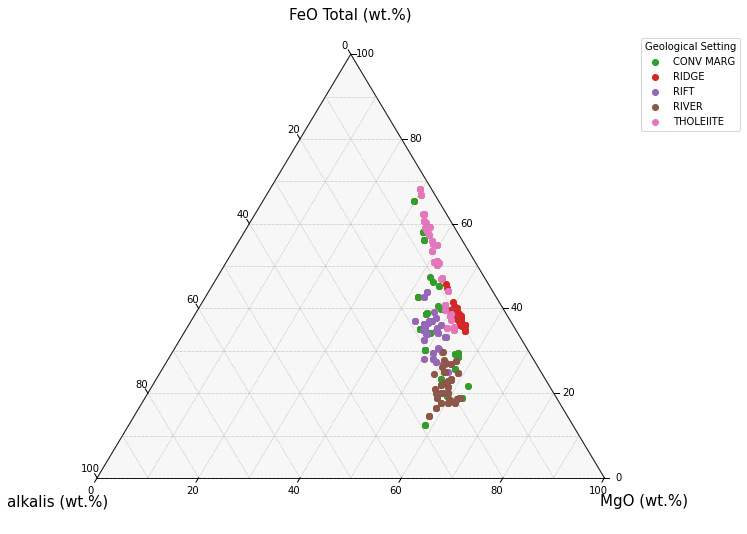

In [16]:
# Set up the figure.
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plot points.
tax.scatter(df_samples[['F', 'M', 'N']].values)

# Plot the points in groups.
for name, group in df_samples.groupby('Geological Setting'):
    
    # Note that we have to shuffle the order.
    # This will place Q at the top, F on the left.
    # So the column order is: right, top, left.
    points = group[['F', 'M', 'N']].values
    tax.scatter(points, marker='o', label=name)
    
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Geological Setting')

# Corner labels.
fontsize = 15
offset = 0.1
tax.top_corner_label("FeO Total (wt.%)", fontsize=fontsize, offset=0.2)
tax.left_corner_label("alkalis (wt.%)", fontsize=fontsize, offset=offset)
tax.right_corner_label("MgO (wt.%)", fontsize=fontsize, offset=offset)

# Decoration.
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.get_axes().axis('off')

tax.show()

# Trace Element Data

In [17]:
df_trace = pd.read_excel (r'C:\Users\698422\Desktop\Teaching\Programming\Working Dataset\Basalt_TraceElement_ForStudents.xlsx', sheet_name='Trace_Element')
print (df_trace)

    Constitutes       Normalization Data   HAWAIIAN EAST AFR COLUMBIA  \
0   Constitutes       Normalization Data  THOLEIITE     RIFT    RIVER   
1   Constitutes       Normalization Data     193-00   W00-43    44760   
2   Constitutes  Chondritic Values (ppm)        NaN      NaN      NaN   
3            Li                     57.1        NaN      NaN      NaN   
4            Be                     0.73        NaN      NaN      NaN   
5            Sc                     34.2        NaN     32.1       41   
6             V                      293        218      350      304   
7            Cr                    13500        550      172      105   
8            Co                     2250        NaN     66.6      NaN   
9            Ni                    49300        254       91      102   
10           Cu                      522        NaN      NaN      132   
11           Zn                     1260        104      NaN       91   
12           Ga                     37.8         19

In [18]:
df_trace.head()

,Constitutes,Normalization Data,HAWAIIAN,EAST AFR,COLUMBIA,TONGA ARC,MID-OCEAN
0,Constitutes,Normalization Data,THOLEIITE,RIFT,RIVER,CONV MARG,RIDGE
1,Constitutes,Normalization Data,193-00,W00-43,44760,129273,075-010
2,Constitutes,Chondritic Values (ppm),NaN,NaN,NaN,NaN,NaN
3,Li,57.1,NaN,NaN,NaN,11.6,NaN
4,Be,0.73,NaN,NaN,NaN,0.2,NaN


In [19]:
data = df_trace.drop(labels=[0,1,2], axis=0)
data

,Constitutes,Normalization Data,HAWAIIAN,EAST AFR,COLUMBIA,TONGA ARC,MID-OCEAN
3,Li,57.1,NaN,NaN,NaN,11.6,NaN
4,Be,0.73,NaN,NaN,NaN,0.2,NaN
5,Sc,34.2,NaN,32.1,41,34,46.04
6,V,293,218,350,304,276,335.06
7,Cr,13500,550,172,105,65,308.02
8,Co,2250,NaN,66.6,NaN,39,NaN
9,Ni,49300,254,91,102,40,120.73
10,Cu,522,NaN,NaN,132,63,98.42
11,Zn,1260,104,NaN,91,76,89.57
12,Ga,37.8,19,NaN,16,19.5,15.78


In [20]:
data["HAWAIIAN_normalized"] = data["HAWAIIAN"]/data["Normalization Data"]
print(data)

   Constitutes Normalization Data HAWAIIAN EAST AFR COLUMBIA TONGA ARC  \
3           Li               57.1      NaN      NaN      NaN      11.6   
4           Be               0.73      NaN      NaN      NaN       0.2   
5           Sc               34.2      NaN     32.1       41        34   
6            V                293      218      350      304       276   
7           Cr              13500      550      172      105        65   
8           Co               2250      NaN     66.6      NaN        39   
9           Ni              49300      254       91      102        40   
10          Cu                522      NaN      NaN      132        63   
11          Zn               1260      104      NaN       91        76   
12          Ga               37.8       19      NaN       16      19.5   
13          Rb               7.09     6.51     10.6       12      1.35   
14          Sr               23.5      297      382      284       171   
15           Y               4.64     

# Histogram plots

<AxesSubplot:xlabel='FeOT', ylabel='Count'>

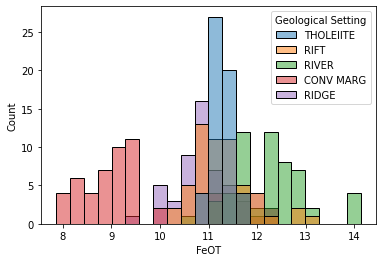

In [24]:
sns.histplot(data=df_samples, x="FeOT", hue="Geological Setting")

<AxesSubplot:xlabel='FeOT', ylabel='Count'>

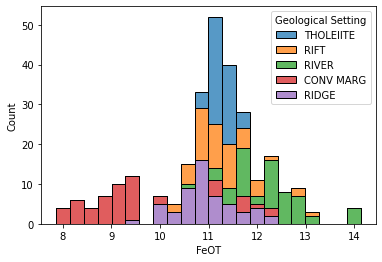

In [26]:
sns.histplot(data=df_samples, x="FeOT", hue="Geological Setting", multiple="stack")

# Regression Plots

In [27]:
#Linear Regression Model
from sklearn import linear_model

In [28]:
X = df_samples[['SiO2']]
y = df_samples['Na2O + K2O']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [29]:
features = ['SiO2']
target = 'Na2O + K2O'

In [30]:
silica = regr.predict([[49.00]])

In [31]:
print(silica)

[2.89050122]


In [33]:
X = df_samples[features].values.reshape(-1, len(features))
y = df_samples[target].values

In [34]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [35]:
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

Features                :  ['SiO2']
Regression Coefficients :  [0.14]
R-squared               :  0.15
Y-intercept             :  -3.85

